In [21]:
import serial
import csv
import time
from datetime import datetime

def read_sensor_and_save_data(file_count, measurement_kind, pressure, measurement_method):
    file_format = "C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real\\real_{date}_{count}_{kind}_{pressure}_{method}.csv"
    #file_format = "C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real\\real_{date}_{count}_{kind}_{pressure}_{method}.csv"
    
    current_date = datetime.now().strftime("%Y%m%d")
    pressure_with_decimal = f"0.{pressure}"  
    csv_filename = file_format.format(date=current_date, count=file_count, kind=measurement_kind, pressure=pressure_with_decimal, method=measurement_method)
    
    try:
        ser = serial.Serial('COM15', 115200, timeout=1)
        
        # 最初のセンサー値取得時の時間を記録
        start_time = time.time()

        with open(csv_filename, mode="w", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(["Time", "Length", "Pressure", "Force"])

            while True:  # 無限ループ
                try:  
                    data = ser.readline().decode().strip()
                    current_time = time.time()
                    elapsed_time = int((current_time - start_time) * 1000)

                    print(f"{elapsed_time} - {data}")

                    if data and not data.startswith("Sensor reading stopped"):
                        parts = data.split(',')
                        if len(parts) == 3:
                            wire_length, pressure_val, force = parts
                            pressure_val = int(pressure_val) / 1000
                            writer.writerow([elapsed_time, wire_length, pressure_val, force])
                        else:
                            print("Invalid data format:", data)
                    elif data.startswith("Sensor reading stopped"):
                        print("Sensor reading stopped. Exiting loop.")
                        break
                except KeyboardInterrupt:
                    print("Interrupt received. Saving CSV file and exiting.")
                    break

    finally:
        ser.close()

file_count = input("測定回数を入力してください(例:1): ")  
measurement_kind = input("測定するマッキベンの種類を入力してください(4s or 4l or 6 or s or u): ")

pressure = input("圧力を入力してください(例:4): ")  
measurement_method = input("測定方法を入力してください(d or s or p): ")

read_sensor_and_save_data(file_count, measurement_kind, pressure, measurement_method)


測定回数を入力してください(例:1):  2
測定するマッキベンの種類を入力してください(4s or 4l or 6 or s or u):  s
圧力を入力してください(例:4):  4
測定方法を入力してください(d or s or p):  s


17 - 0.00,402,0.00
37 - 0.00,402,0.00
58 - 0.00,402,0.00
78 - 0.00,401,0.00
99 - 0.00,402,0.00
116 - 0.00,402,0.00
136 - 0.00,401,0.00
152 - 0.00,404,0.00
174 - 0.00,402,0.00
194 - 0.00,401,0.00
217 - 0.00,402,0.00
238 - 0.00,402,0.00
258 - 0.00,402,0.00
277 - 0.00,402,0.00
297 - 0.00,401,0.00
317 - 0.00,402,0.00
333 - 0.00,401,0.00
356 - 0.00,402,0.00
375 - 0.00,402,0.00
393 - 0.00,401,0.00
414 - 0.00,402,0.00
438 - 0.00,401,0.00
459 - 0.00,402,0.00
479 - 0.00,401,0.00
495 - 0.00,402,0.00
516 - 0.00,402,0.00
526 - 0.00,402,0.00
552 - 0.00,401,0.00
577 - 0.00,401,0.00
595 - 0.00,402,0.00
612 - 0.00,402,0.00
634 - 0.00,401,0.00
640 - 0.00,402,0.00
676 - 0.00,402,0.00
696 - 0.00,402,0.00
717 - 0.00,402,0.00
737 - 0.00,402,0.00
742 - 0.00,402,0.00
775 - 0.00,402,0.00
789 - 0.00,402,0.00
815 - 0.00,402,0.00
826 - 0.00,401,0.00
856 - 0.00,402,0.00
875 - 0.00,402,0.00
897 - 0.00,402,0.00
918 - 0.00,402,0.00
938 - 0.00,402,0.00
940 - 0.00,401,0.00
971 - 0.00,402,0.00
987 - 0.00,401,0.00
1013 

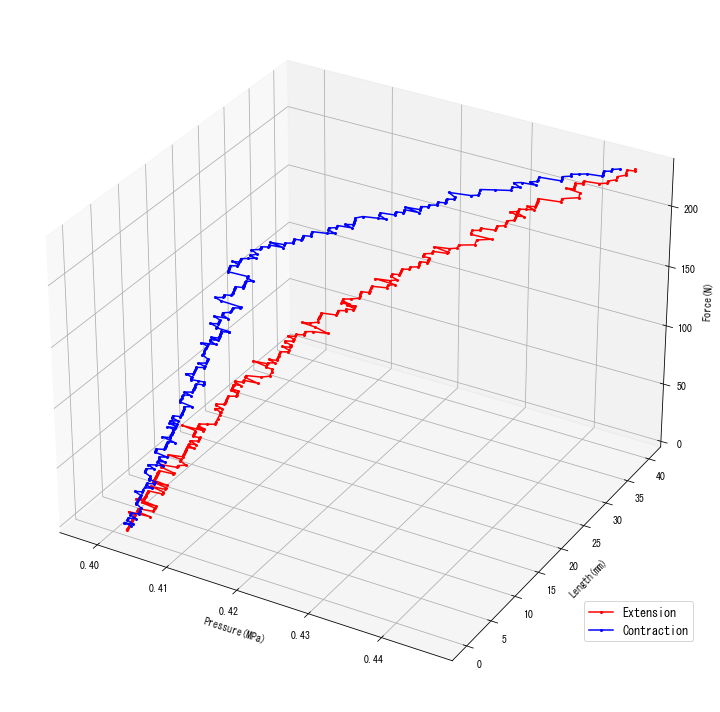

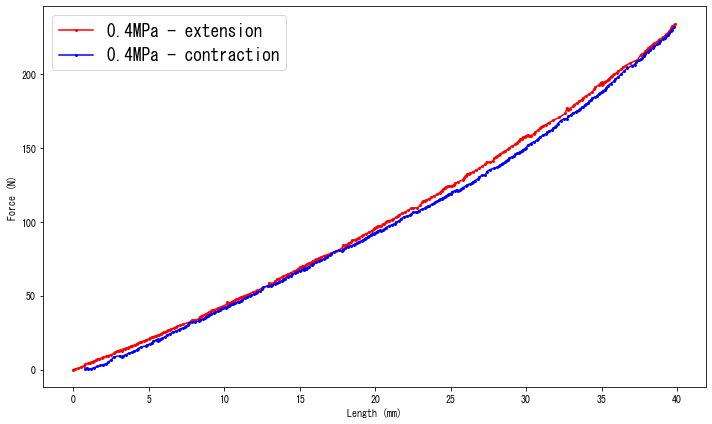

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime


pressure_with_decimal = f"0.{pressure}"  

# データの読み込み
current_date = datetime.now().strftime("%Y%m%d")
input_file_path = f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real\\real_{current_date}_{file_count}_{measurement_kind}_{pressure_with_decimal}_{measurement_method}.csv"
df = pd.read_csv(input_file_path)


# "Length"列の重複を削除
cleaned_df = df[df['Length'] != df['Length'].shift()]

# クリーンなデータを別のファイルとして保存
output_file_path = f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_processed\\p_real_{current_date}_{file_count}_{measurement_kind}_{pressure_with_decimal}_{measurement_method}.csv"
cleaned_df.to_csv(output_file_path, index=False)

%matplotlib inline

current_date = datetime.now().strftime("%Y%m%d")
plt.rcParams['font.family'] = 'MS Gothic'  # 凡例やラベルに日本語を使っても文字化けしないようにする

# データの読み込み
data_path = f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_processed\\p_real_{current_date}_{file_count}_{measurement_kind}_{pressure_with_decimal}_{measurement_method}.csv"
dt = pd.read_csv(data_path)

# 列の選択
column = dt[["Pressure", "Length", "Force"]]

# 最初のPressureデータを取得して四捨五入
first_pressure = round(column["Pressure"].iloc[0], 2)  # 少数第三位を四捨五入

# グラフの作成
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# 最初のデータからForceが最大値を取るデータまでの範囲（赤色）
ax.plot(column["Pressure"].iloc[:column["Force"].idxmax()+1], 
        column["Length"].iloc[:column["Force"].idxmax()+1], 
        column["Force"].iloc[:column["Force"].idxmax()+1], 
        c='r',marker = 'o',markersize = 2, label=f'{first_pressure}MPa - extension')

# Forceが最大値を取ったデータから最後のデータまでの範囲（青色）
ax.plot(column["Pressure"].iloc[column["Force"].idxmax()+1:], 
        column["Length"].iloc[column["Force"].idxmax()+1:], 
        column["Force"].iloc[column["Force"].idxmax()+1:], 
        c='b',marker = 'o',markersize = 2,label=f'{first_pressure}MPa - contraction')

# 軸ラベルの設定
ax.set_xlabel('Pressure(MPa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('Force(N)')

# x軸のメモリフォーマットと設定
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # 少数第二位まで表示

# 凡例の表示
fig.legend(labels=['Extension', 'Contraction'], loc=(0.81,0.1), fontsize='large')

# グラフの保存
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\single\\single_{current_date}_{file_count}_{measurement_kind}_{pressure_with_decimal}_{measurement_method}-1.jpg'
plt.savefig(save_path,bbox_inches='tight')

plt.tight_layout()  # 追加：グラフが適切にレイアウトされるように
plt.show()


#以下2D


# データの読み込み
#dt = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_processed\\p_real_{current_date}_{file_count}.csv")
dt = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_processed\\p_real_{current_date}_{file_count}_{measurement_kind}_{pressure_with_decimal}_{measurement_method}.csv")

# 列の選択（Pressure列を削除）
column = dt[["Length", "Force"]]

# 最初のPressureデータを取得して四捨五入
first_pressure = round(dt["Pressure"].iloc[0], 2)  # 少数第三位を四捨五入

# 二次元プロット
fig, ax = plt.subplots(figsize=(10,6))

# Forceが最大値を取るまでの範囲を赤でプロット
ax.plot(column["Length"][:dt["Force"].idxmax() + 1], column["Force"][:dt["Force"].idxmax() + 1], c='r',marker = 'o',markersize = 2,label=f'{first_pressure}MPa - extension')

# Forceが最大値を取った後の範囲を青でプロット
ax.plot(column["Length"][dt["Force"].idxmax() + 1:], column["Force"][dt["Force"].idxmax() + 1:], c='b',marker = 'o',markersize = 2,label=f'{first_pressure}MPa - contraction')

# 軸ラベルの設定
ax.set_xlabel('Length (mm)')
ax.set_ylabel('Force (N)')

# 軸のメモリのフォーマットおよび設定
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# 凡例の表示
ax.legend(loc = 'upper left',fontsize = 'xx-large')


# 保存パスとファイル名を指定してグラフを画像として保存（JPG形式）
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\single\\single_{current_date}_{file_count}_{measurement_kind}_{pressure_with_decimal}_{measurement_method}-2.jpg'
plt.savefig(save_path,bbox_inches='tight')

# グラフの表示
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
plt.tight_layout()# 追加：グラフが適切にレイアウトされるように
plt.show()
